# 3. Process Basin Storage Module

# 3.1 Import functions

In [1]:
import  datetime
starttime = datetime.datetime.now()

In [2]:
import os
import glob
import pandas as pd
#import WAPORWA modules
os.chdir(r'C:\WA_Souss_Massa_Training\WAPOR\modules') #change to modules path

import WA
from WA.dS_from_grace import main as calc_dS_basin
from WA.pickle_basin import pickle_in,pickle_out  

# Read pickle
Main_dir=r"C:\WA_Souss_Massa_Training\WAPOR\Souss_Massa\Main"
pickle=glob.glob(os.path.join(Main_dir,'*.pickle'))[-1]
BASIN=pickle_in(pickle)

# 3.2 Calculate Basin Total Water Storage Anomalies

In [3]:
BASIN_SHP= BASIN['geo_data']['basin']# path to basin shapefile
basin_grace_folder= os.path.join(BASIN['Dir'],'grace')
if not os.path.exists(basin_grace_folder):
    os.makedirs(basin_grace_folder)
OUT_CSV= os.path.join(basin_grace_folder,'ts_GRACE.csv')# path to basin GRACE time-series csv file
MASCON_DATA_FOLDER = BASIN['global_data']['grace']# path to GRACE folder
end_month=BASIN['end_month']
                            
success=calc_dS_basin(BASIN_SHP,MASCON_DATA_FOLDER,OUT_CSV)
if success:
    BASIN['input_ts']['dS']=[OUT_CSV,'mm of Equivalent Water Height','Total Water Storage Anomalies']
    pickle_out(BASIN)

# 3.3 Estimate yearly Total Water Storage Change

In [4]:
# Read GRACE basin pseudo-monthly estimates
grace_basin_csv=OUT_CSV
ts_grace=pd.read_csv(grace_basin_csv,sep=',',index_col=0)
ts_day=pd.DataFrame(index=pd.date_range(start='2003-01-06',end='2016-07-14',freq='D'))
# Interpolate GRACE estimates to daily time-step
ts_grace_daily=pd.merge(ts_day,ts_grace, left_index=True,right_index=True, how='outer')
ts_grace_interpolate_daily=ts_grace_daily.interpolate()
# Estimate monthly TWS change by Central difference
ts_grace_monthly_firstday=ts_grace_interpolate_daily.resample('MS').first()
ts_dS_monthly=ts_grace_monthly_firstday.diff(2).shift(-1)/2
# Estimate yearly TWS change
ts_dS_yearly=ts_dS_monthly.resample('A-{0}'.format(end_month)).sum()
ts_dS_yearly.columns=['TWS Change [mm/year]']

OUT_CSV=os.path.join(basin_grace_folder,'ts_GRACE_yearly.csv')
ts_dS_yearly.to_csv(OUT_CSV,sep=';')
BASIN['input_ts']['dS_yearly']=[OUT_CSV,'mm of Equivalent Water Height','Yearly Total Water Storage Change']
pickle_out(BASIN)

'C:\\WA_Souss_Massa_Training\\WAPOR\\Souss_Massa\\Main\\Info_20221020_12h17.pickle'

# 3.4 Plot GRACE TWS

<AxesSubplot:xlabel='date'>

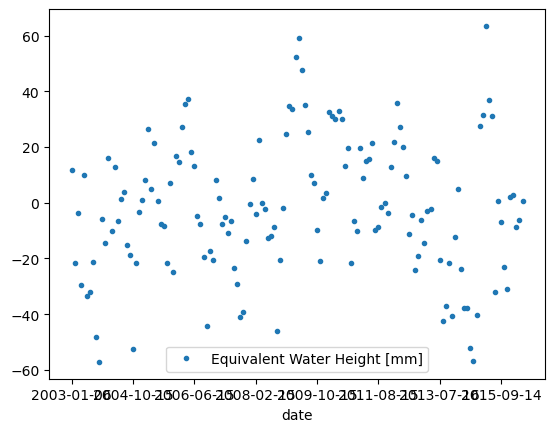

In [5]:
ts_grace.plot(style='.')

<AxesSubplot:>

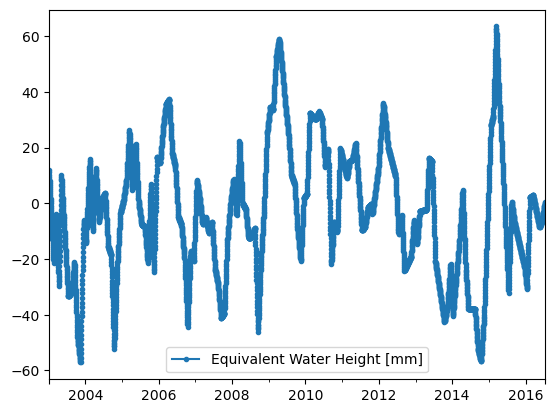

In [6]:
ts_grace_interpolate_daily.plot(style='.-')

<AxesSubplot:>

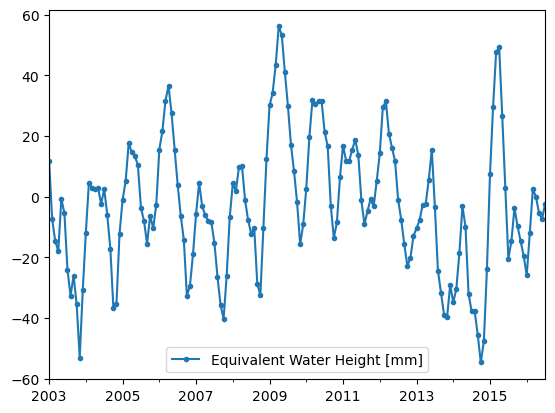

In [7]:
ts_grace_monthly_firstday.plot(style='.-')

<AxesSubplot:>

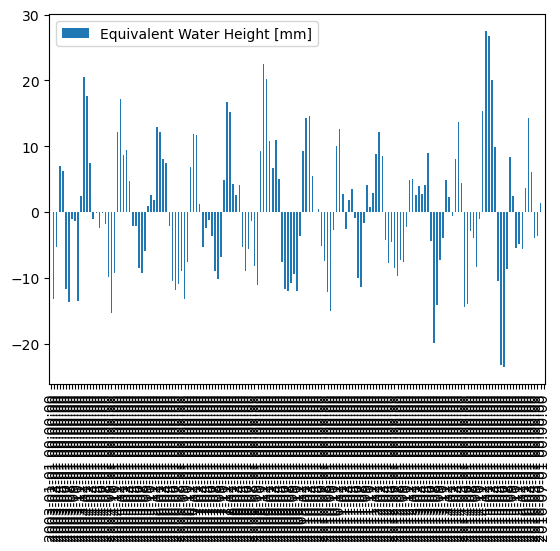

In [8]:
ts_dS_monthly.plot.bar()

In [9]:
endtime = datetime.datetime.now()
print(endtime-starttime)

0:00:08.272269
